In [45]:
using DelimitedFiles
using DataFrames
using DynamicAxisWarping
using Plots

push!(LOAD_PATH,"./src/")
using ExpEval

In [2]:
## For UCR archive information handeling
url="https://www.cs.ucr.edu/~eamonn/time_series_data_2018/DataSummary.csv"
DataSumary, DataSumary_header = readdlm(download(url), ',', header = true)
DataSumary_header[[1,4,5]] = ["ID", "Train", "Test"] # Original names "\ufeffID", "Train ", "Test "

DataSumary_df = DataFrame(DataSumary, vec(DataSumary_header))
println(size(DataSumary_df))
print(DataSumary_df[1:15,:])

(128, 12)
15×12 DataFrame
 Row │ ID   Type       Name                   Train  Test  Class  Length  ED (w=0)  DTW (learned_w)   DTW (w=100)  Default rate  Data donor/editor        
     │ Any  Any        Any                    Any    Any   Any    Any     Any       Any               Any          Any           Any                      
─────┼────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
   1 │ 1    Image      Adiac                  390    391   37     176     0.3887    0.3913 (3)        0.3964       0.9591        A. Jalba
   2 │ 2    Image      ArrowHead              36     175   3      251     0.2       0.2000 (0)        0.2971       0.6057        L. Ye & E. Keogh
   3 │ 3    Spectro    Beef                   30     30    5      470     0.3333    0.3333 (0)        0.3667       0.8           K. Kemsley &  A. Bagnall
   4 │ 4    Image      BeetleFly              20     20    2      512  

In [3]:
## THIS SHOULD BE IN UTILS

function relabelLabels(labels_old)
    # Take a vector of n labels from c clases (works for ints and strings) 
    # and maps it bijectivelly to 1,2,...,c
    # Example: [b,b,a,c,b] -> [2,2,1,3,2]
    
    classes = sort(unique(labels_old))
    labels = Array{Int, 1}(undef, length(labels_old))
    
    for i = 1:length(labels_old)
        for j = 1:length(classes)
            if labels_old[i] == classes[j]
                labels[i] = j
            end
        end
    end
    return labels
end

relabelLabels (generic function with 1 method)

In [24]:
# Load test dataset 
ID = 101
TEST, TEST_labels, TRAIN, TRAIN_labels = LoadDataBase(ID, DataSumary_df, true);

#labels = relabelLabels()

ID      : 101
Name    : Fungi
Length  : 201
Train   : 18
Test    : 186
Classes : 18
    Train Classes: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
    Test  Classes: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
---------------------------------------------------


C_1 = 1
C_8 = 2


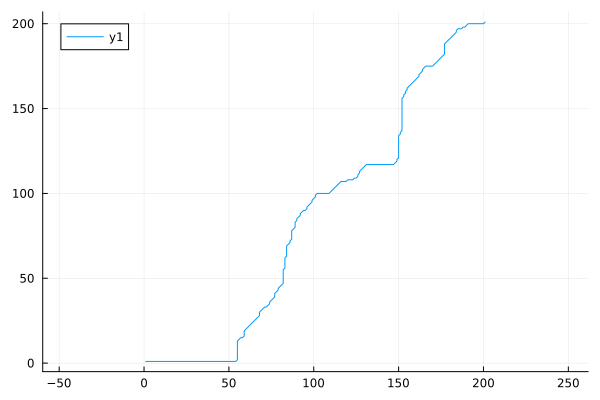

In [50]:
i = 1
j = 8

println("C_$i = ",TEST_labels[i],"\nC_$j = ",TEST_labels[j])

cost, i1, i2  = dtw(TEST[i,:],TEST[j,:])
plot(i1, i2, ratio=1)

In [11]:
?dtw

search: dtw dtwnn DTW dtwplot dtwplot! dtw_cost DTWDistance dtw_cost_matrix



```
cost,i1,i2 = dtw(seq1, seq2, [dist=SqEuclidean, postprocess=nothing])
cost,i1,i2 = dtw(seq1, seq2, dist, i2min, i2max)
```

Perform dynamic-time warping to measure the distance between two sequences.

Find a set of indices (`i1`,`i2`) that align two series (`seq1`,`seq2`) by dynamic axis warping. Also returns the distance (after warping) according to the SemiMetric `dist`, which defaults to squared Euclidean distance (see Distances.jl). If `seq1` and `seq2` are matrices, each column is considered an observation.

If `i2min/max` are provided, do DTW to align `seq1` and `seq2` confined to a window. Vectors `i2min` and `i2max` specify (inclusive) lower and upper bounds for `seq2` for each index in `seq1`. Thus, `i2min` and `i2max` are required to be the same length as `seq1`.

If `filternernel::AbstractMatrix` is provided, it's used to filter the cost matrix. Create a suitable kerlen using, e.g., `ImageFiltering.Kernel.gaussian(3)`. The filtering of the cost matrix makes the warping smoother, effectively penalizing small-scale warping.

See also [`dtw_cost`](@ref) and [`dtwnn`](@ref).


In [12]:
?dtwnn

search: dtwnn DTWDistance gdtw_warpings



```
search_result = dtwnn(q, y, dist, rad, [normalizer::Type{Nothing}]; kwargs...)
```

Compute the nearest neighbor to `q` in `y`. An optinal normalizer type can be supplied, see, `ZNormalizer, DiagonalZNormalizer, NormNormalizer`.

# Arguments:

  * `q`: query (the short time series)
  * `y`: data ( the long time series)
  * `dist`: distance
  * `rad`: radius
  * `showprogress`: Defaults to true
  * `prune_endpoints = true`: use endpoint heuristic
  * `prune_envelope  = true`: use envelope heuristic
  * `bsf_multiplier  = 1`: If > 1, require lower bound to exceed `bsf_multiplier*best_so_far`.
  * `saveall = false`: compute a dense result (takes longer, no early stopping methods used). If false, then a vector of lower bounds on the distance is stored in `search_result.dists`, if true, all distances are computed and stored.
  * `avoid`: If an integer index (or set of indices) is provided, this index will be avoided in the search. This is useful in case `q` is a part of `y`.
